# Trabalho de Motores

In [23]:
import pandas as pd
import numpy as np
import locale
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sp

from scipy.signal import argrelextrema

locale.setlocale(locale.LC_ALL, 'pt_BR')
%matplotlib widget
plt.style.use('duarte')
MARKER='.'
FLIER = 0.5

## 1. Ensaio de Fluxo

In [2]:
ge = pd.read_excel(io='dados.xlsx',
                   sheet_name='geometria',
                   header=[0,1])
display(ge)
display(ge.describe())

escape                   admissao                 
  d_valvula h_valvula  d_int d_valvula h_valvula  d_int
0     24.88      4.93  20.48     28.44      5.10  24.60
1     25.10      4.90  19.85     28.40      5.00  24.35
2     24.90      4.90  20.50     28.45      4.95  24.40
3     24.47      5.00    NaN     28.00      5.00    NaN

escape                        admissao                     
      d_valvula h_valvula      d_int  d_valvula h_valvula      d_int
count   4.00000   4.00000   3.000000   4.000000  4.000000   3.000000
mean   24.83750   4.93250  20.276667  28.322500  5.012500  24.450000
std     0.26437   0.04717   0.369639   0.216083  0.062915   0.132288
min    24.47000   4.90000  19.850000  28.000000  4.950000  24.350000
25%    24.77750   4.90000  20.165000  28.300000  4.987500  24.375000
50%    24.89000   4.91500  20.480000  28.420000  5.000000  24.400000
75%    24.95000   4.94750  20.490000  28.442500  5.025000  24.500000
max    25.10000   5.00000  20.500000  28.450000  5.100000  24.600000

In [3]:
ef = pd.read_excel('ensaio_fluxo.xlsx',
                   header=[0,1])
ef

ava                      eve                      eva                
  pressao abertura   fluxo pressao abertura   fluxo pressao abertura  fluxo
0   25.03        1   29.11   25.01        1   25.97   25.01        1  24.12
1   25.03        2   54.12   25.02        2   53.92   25.01        2  49.43
2   25.02        3   74.55   25.02        3   75.77   25.02        3  72.81
3   25.04        4   87.17   25.01        4   91.36   25.02        4  87.03
4   25.03        5   94.37   25.02        5  105.32   25.02        5  92.68
5   25.04        6   98.87   25.04        6  115.26   25.02        6  94.28
6   25.04        7  101.04   25.03        7  119.16   25.02        7  95.16
7   25.02        8  102.35   25.02        8  120.74   25.02        8  95.86
8   24.99        9  103.70   24.92        9  121.74   25.02        9  96.33
9   25.01       10  104.07   25.04       10  121.68   25.01       10  96.74

In [4]:
print(ef.style.format(precision=2,
                      decimal=',',
                      thousands='.').to_latex())

\begin{tabular}{lrrrrrrrrr}
 & \multicolumn{3}{r}{ava} & \multicolumn{3}{r}{eve} & \multicolumn{3}{r}{eva} \\
 & pressao & abertura & fluxo & pressao & abertura & fluxo & pressao & abertura & fluxo \\
0 & 25,03 & 1 & 29,11 & 25,01 & 1 & 25,97 & 25,01 & 1 & 24,12 \\
1 & 25,03 & 2 & 54,12 & 25,02 & 2 & 53,92 & 25,01 & 2 & 49,43 \\
2 & 25,02 & 3 & 74,55 & 25,02 & 3 & 75,77 & 25,02 & 3 & 72,81 \\
3 & 25,04 & 4 & 87,17 & 25,01 & 4 & 91,36 & 25,02 & 4 & 87,03 \\
4 & 25,03 & 5 & 94,37 & 25,02 & 5 & 105,32 & 25,02 & 5 & 92,68 \\
5 & 25,04 & 6 & 98,87 & 25,04 & 6 & 115,26 & 25,02 & 6 & 94,28 \\
6 & 25,04 & 7 & 101,04 & 25,03 & 7 & 119,16 & 25,02 & 7 & 95,16 \\
7 & 25,02 & 8 & 102,35 & 25,02 & 8 & 120,74 & 25,02 & 8 & 95,86 \\
8 & 24,99 & 9 & 103,70 & 24,92 & 9 & 121,74 & 25,02 & 9 & 96,33 \\
9 & 25,01 & 10 & 104,07 & 25,04 & 10 & 121,68 & 25,01 & 10 & 96,74 \\
\end{tabular}



In [5]:
print(ge.style.format(precision=2,
                      decimal=',',
                      thousands='.').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{3}{r}{escape} & \multicolumn{3}{r}{admissao} \\
 & d_valvula & h_valvula & d_int & d_valvula & h_valvula & d_int \\
0 & 24,88 & 4,93 & 20,48 & 28,44 & 5,10 & 24,60 \\
1 & 25,10 & 4,90 & 19,85 & 28,40 & 5,00 & 24,35 \\
2 & 24,90 & 4,90 & 20,50 & 28,45 & 4,95 & 24,40 \\
3 & 24,47 & 5,00 & nan & 28,00 & 5,00 & nan \\
\end{tabular}



In [6]:
# HIPERPARAMETROS
D_VAL_E = ge.describe().loc['mean'].loc['escape'].loc['d_valvula'] * 1e-3   # m
D_VAL_A = ge.describe().loc['mean'].loc['admissao'].loc['d_valvula'] * 1e-3 # m
H_VAL_E = ge.describe().loc['mean'].loc['escape'].loc['h_valvula'] * 1e-3   # m
H_VAL_A = ge.describe().loc['mean'].loc['admissao'].loc['h_valvula'] * 1e-3 # m
D_GARG_E = ge.describe().loc['mean'].loc['escape'].loc['d_int'] * 1e-3      # m
D_GARG_A = ge.describe().loc['mean'].loc['admissao'].loc['d_int'] * 1e-3    # m

FLUXO_AVA = ef.ava.fluxo / 2119 # m3/s
FLUXO_EVE = ef.eve.fluxo / 2119 # m3/s
FLUXO_EVA = ef.eva.fluxo / 2119 # m3/s

LEVANTE = np.arange(1,11,1) * 1e-3 # m

P_ENSAIO = 25 * 249     # Pa
P0 = 96.3 * 1e3         # Pa
T0 = 25.8 + 273.15      # K


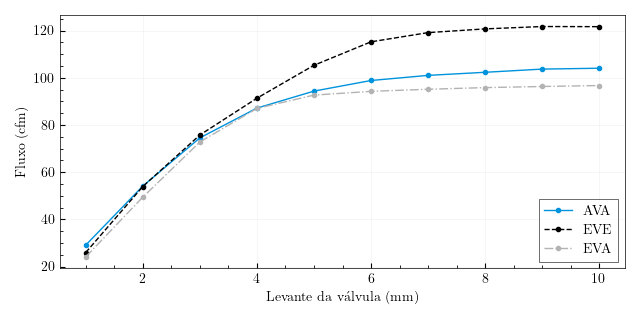

In [7]:
cm = 1/2.5


fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(LEVANTE * 1e3, 
        FLUXO_AVA * 2119, 
        label='AVA',
        marker=MARKER)
ax.plot(LEVANTE * 1e3, 
        FLUXO_EVE * 2119, 
        label='EVE',
        marker=MARKER)
ax.plot(LEVANTE * 1e3, 
        FLUXO_EVA * 2119, 
        label='EVA',
        marker=MARKER)
ax.legend(loc=4)
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel('Fluxo (cfm)')

fig.tight_layout()
fig.savefig('../relatorio/figuras/levante_fluxo.pgf',
            backend='pgf')
fig.savefig('../relatorio/figuras/levante_fluxo.pdf',
            backend='pgf')

### 1.1 Áreas

#### 1.1.1 Área de cortina $\times$ Levante das válvulas

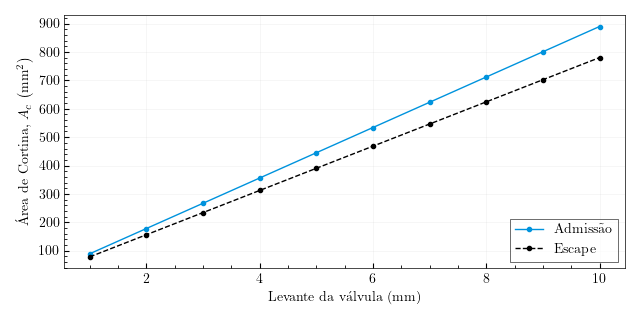

In [8]:
# AREA DE CORTINA
def area_cortina(d_valvula, levante):
    return np.pi * d_valvula * levante

ac_admissao = area_cortina(D_VAL_A, LEVANTE)
ac_escape = area_cortina(D_VAL_E, LEVANTE)

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(LEVANTE * 1e3, 
        ac_admissao * 1e6, 
        label='Admissão', 
        marker=MARKER)
ax.plot(LEVANTE * 1e3, 
        ac_escape * 1e6, 
        label='Escape', 
        marker=MARKER)
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel(r'Área de Cortina, $A_c$ $\left(\mathrm{mm}^2\right)$')
ax.legend(loc=4)

fig.tight_layout()
fig.savefig('../relatorio/figuras/levante_ac.pgf',
            backend='pgf')
fig.savefig('../relatorio/figuras/levante_ac.pdf',
            backend='pgf')

#### 1.1.2 Área de garganta

In [9]:
# AREA DE GARGANTA
def area_garganta(d_valvula, d_haste):
    return np.pi/4 * (d_valvula**2 - d_haste**2)

ag_admissao = area_garganta(D_VAL_A, H_VAL_A)
ag_escape = area_garganta(D_VAL_E, H_VAL_E)

print(f'Área de garganta na admissão: {ag_admissao*1e6:.6f} mm2')
print(f'Área de garganta no escape: {ag_escape*1e6:.6f} mm2')

Área de garganta na admissão: 610.284886 mm2
Área de garganta no escape: 465.404843 mm2


### 1.2 Coeficiente de descarga ($C_d$)

In [10]:
def rho(P, R, T):
    return P / (R*T)

def vth(P0, rho0, deltaP, gamma=1.4):
    rhoS = rho0 * (1-deltaP/P0)**(1/gamma)

    f1 = P0/rhoS
    f2 = (2*gamma) / (gamma - 1)
    f3 = 1 - (1-deltaP/P0)**((gamma-1)/gamma)

    # return np.sqrt(f1*f2*f3)
    return np.sqrt(f1*f2*f3)

RHO_AR = rho(P = P0,        # Pa
             T = T0,        # K
             R = 287        # J/kg*K (Tab. A1 - ÇENGEL)
             )

VTH = vth(P0=P0,
          rho0=RHO_AR,
          deltaP=P_ENSAIO)
print(f'Velocidade teórica de escoamento: {VTH:.2f} m/s')
print(f'Vazao teórica de escoamento (admissão): {VTH*ag_admissao:.2f} m3/s = {VTH*ag_admissao*2119:.2f} cfm')
print(f'Vazao teórica de escoamento (escape): {VTH*ag_escape:.2f} m3/s = {VTH*ag_escape*2119:.2f} cfm')

Velocidade teórica de escoamento: 109.15 m/s
Vazao teórica de escoamento (admissão): 0.07 m3/s = 141.15 cfm
Vazao teórica de escoamento (escape): 0.05 m3/s = 107.64 cfm


In [11]:
# CONSIDERANDO ÁREA DE GARGANTA
cd_ava_ag = FLUXO_AVA / (VTH * ag_admissao)
cd_eve_ag = FLUXO_EVE / (VTH * ag_escape)
cd_eva_ag = FLUXO_EVA / (VTH * ag_admissao)

# CONSIDERANDO ÁREA MÍNIMA
amin_adm = np.array([ac if ac < ag_admissao else ag_admissao for ac in ac_admissao])
amin_esc = np.array([ac if ac < ag_escape else ag_escape for ac in ac_escape])

cd_ava_amin = FLUXO_AVA / (VTH * amin_adm)
cd_eve_amin = FLUXO_EVE / (VTH * amin_esc)
cd_eva_amin = FLUXO_EVA / (VTH * amin_adm)


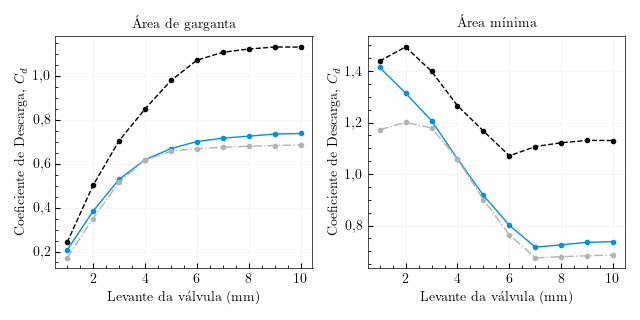

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16*cm, 8*cm))

ax1.plot(LEVANTE * 1e3, 
        cd_ava_ag, 
        label='AVA', 
        marker=MARKER)
ax1.plot(LEVANTE * 1e3, 
        cd_eve_ag, 
        label='EVE', 
        marker=MARKER)
ax1.plot(LEVANTE * 1e3, 
        cd_eva_ag, 
        label='EVA', 
        marker=MARKER)
ax1.set_xlabel('Levante da válvula (mm)')
ax1.set_ylabel('Coeficiente de Descarga, $C_d$')
ax1.set_title('Área de garganta')

ax2.plot(LEVANTE * 1e3, 
        cd_ava_amin, 
        label='AVA', 
        marker=MARKER)
ax2.plot(LEVANTE * 1e3, 
        cd_eve_amin, 
        label='EVE', 
        marker=MARKER)
ax2.plot(LEVANTE * 1e3, 
        cd_eva_amin, 
        label='EVA', 
        marker=MARKER)
ax2.set_xlabel('Levante da válvula (mm)')
ax2.set_ylabel('Coeficiente de Descarga, $C_d$')
ax2.set_title('Área mínima')

h, l = ax1.get_legend_handles_labels()
fig.legend(h, l, ncols=3, loc='lower center', bbox_to_anchor=(0.5,-0.1))
fig.tight_layout()
fig.savefig('../relatorio/figuras/levante_cd.pgf',
            backend='pgf', bbox_inches='tight')
fig.savefig('../relatorio/figuras/levante_cd.pdf',
            backend='pgf', bbox_inches='tight')

## 2. Ensaio Dinamométrico

In [13]:
ed = pd.read_excel(io='ensaio_din.xlsx',
                   header=[3,4],
                   skiprows=[x for x in range(5,12)])

ed.columns = ['_'.join(col).strip() for col in ed.columns.values]

ed['NOME_PASSO_Unnamed: 5_level_1'] = ed['NOME_PASSO_Unnamed: 5_level_1'].str.replace(' ESTAB', '').astype(int)  

display(ed.tail())

,DATA_DD/MM/AA,HORA_HH:MM:SS,HORIM_TOTAL_HH:MM,HORIM_AUTO_HH:MM,NÚMERO_PASSO_Unnamed: 4_level_1,NOME_PASSO_Unnamed: 5_level_1,OBSERVAÇÃO_Unnamed: 6_level_1,CICLO_Unnamed: 7_level_1,FC_NBR ISO 1585,ROTAÇÃO_rpm,...,P_ATM_mbar,UMIDADE_%,T_AMBIENTE_ºC,ALFA_%.1,RES_4_Unnamed: 27_level_1,RES_5_Unnamed: 28_level_1,RES_6_Unnamed: 29_level_1,RES_7_Unnamed: 30_level_1,P_BAROM_AR_SECO_kPa,REGISTROS_Unnamed: 32_level_1
537,2023-11-24,18:30:22,34:45,00:17,26,1000,NaN,0,1.063,977.89,...,966.54,45.74,36.42,15.18,0,0,0,0,938.73,545
538,2023-11-24,18:30:23,34:45,00:17,26,1000,NaN,0,1.061,966.68,...,966.54,45.74,36.52,15.18,0,0,0,0,938.58,546
539,2023-11-24,18:30:24,34:45,00:17,26,1000,NaN,0,1.064,957.14,...,966.54,45.74,36.52,15.18,0,0,0,0,938.58,547
540,2023-11-24,18:30:25,34:45,00:17,26,1000,NaN,0,1.071,937.48,...,966.54,45.74,36.52,15.18,0,0,0,0,938.58,548
541,2023-11-24,18:30:26,34:45,00:17,26,1000,NaN,0,1.075,910.65,...,966.54,45.74,36.52,15.18,0,0,0,0,938.58,549


In [14]:
np.array(ed.columns)

array(['DATA_DD/MM/AA', 'HORA_HH:MM:SS', 'HORIM_TOTAL_HH:MM',
       'HORIM_AUTO_HH:MM', 'NÚMERO_PASSO_Unnamed: 4_level_1',
       'NOME_PASSO_Unnamed: 5_level_1', 'OBSERVAÇÃO_Unnamed: 6_level_1',
       'CICLO_Unnamed: 7_level_1', 'FC_NBR ISO 1585', 'ROTAÇÃO_rpm',
       'TORQUE_Nm', 'TORQUE_kgm', 'TORQUE_C_Nm', 'TORQUE_C_kgm', 'ALFA_%',
       'POT_EFET_kW', 'POT_C_kW', 'POT_C_HP', 'POT_C_CV', 'T_ÁGUA_S_ºC',
       'T_COL_ADM_ºC', 'P_ÓLEO_bar', 'P_COL_ADM_mbar', 'P_ATM_mbar',
       'UMIDADE_%', 'T_AMBIENTE_ºC', 'ALFA_%.1',
       'RES_4_Unnamed: 27_level_1', 'RES_5_Unnamed: 28_level_1',
       'RES_6_Unnamed: 29_level_1', 'RES_7_Unnamed: 30_level_1',
       'P_BAROM_AR_SECO_kPa', 'REGISTROS_Unnamed: 32_level_1'],
      dtype=object)

In [15]:
# HIPERPARAMETROS
TORQUE_NOMINAL = ed.TORQUE_Nm                          # N.m
TORQUE_C = ed.TORQUE_C_Nm                              # N.m
ROTACAO_NOMINAL = ed.ROTAÇÃO_rpm / 60                  # RPS
ROTACAO = ed['NOME_PASSO_Unnamed: 5_level_1'] / 60     # RPS
POTENCIA = ed.POT_EFET_kW * 1e3                        # W
POT_C = ed.POT_C_kW * 1e3                              # W
P_COL_ADM = ed.P_COL_ADM_mbar * 1e2                    # Pa
P_ATM = ed.P_ATM_mbar * 1e2                            # Pa
P_OLEO = ed.P_ÓLEO_bar * 1e5                           # Pa

CILINDRADA = 6.8 * 1e-3                                 # m3
D_CILINDRO = 106 * 1e-3                                # m
CURSO = (2 * CILINDRADA) / (3 * np.pi * D_CILINDRO**2) # m
R_MANIVELA = CURSO/2                                   # m
L_BIELA = 203 * 1e-3                                   # m 
RL = R_MANIVELA / L_BIELA

### 2.1 Pressão média $\times$ rotação

### 2.2 Torque $\times$ rotação

### 2.3 Potência $\times$ rotação

### 2.4 Carga lateral do pistão $\times$ rotação
- considerando ângulo de 90o e PME

In [16]:
def carga_lateral(potencia, cilindrada, rotacao, diametro, RL, alpha=np.pi/2):
    P = (2 * potencia) / (cilindrada * rotacao)

    n = np.pi * P * diametro * RL * np.sin(alpha)
    d = 4*np.sqrt(1 - RL**2*(np.sin(alpha))**2)
    return n/d, P

FL, Press = carga_lateral(potencia=POTENCIA, 
                          cilindrada=CILINDRADA, 
                          rotacao=ROTACAO,
                          diametro=D_CILINDRO,
                          RL=RL)

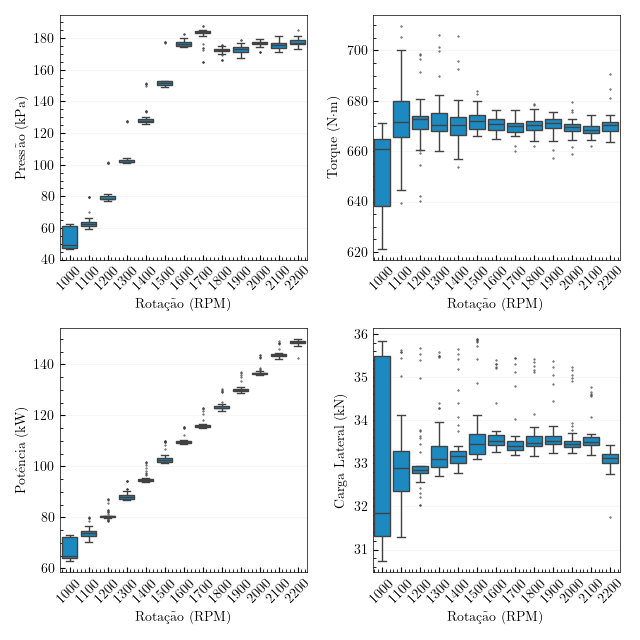

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16*cm, 16*cm))
plt.rcParams['xtick.minor.bottom'] = False

# PRESSAO MEDIA X ROTACAO
sns.boxplot(x=(ROTACAO * 60).astype(int),
            y=P_COL_ADM * 1e-3,
            ax=ax1,
            fliersize=FLIER)
            # marker=MARKER)
ax1.set_xlabel('Rotação (RPM)')
ax1.set_ylabel('Pressão (kPa)')
ax1.tick_params(axis='x', labelrotation=45)

# TORQUE NOMINAL X ROTACAO
sns.boxplot(x=(ROTACAO * 60).astype(int),
            y=TORQUE_NOMINAL,
            ax=ax2,
            fliersize=FLIER)
ax2.set_xlabel('Rotação (RPM)')
ax2.set_ylabel('Torque (N$\cdot$m)')
ax2.tick_params('x', labelrotation=45)

# POTENCIA X ROTACAO
sns.boxplot(x=(ROTACAO * 60).astype(int),
            y=POTENCIA * 1e-3,
            ax=ax3,
            fliersize=FLIER)
ax3.set_xlabel('Rotação (RPM)')
ax3.set_ylabel('Potência (kW)')
ax3.tick_params('x', labelrotation=45)

# CARGA LATERAL X ROTACAO
sns.boxplot(x=(ROTACAO * 60).astype(int),
            y=FL * 1e-3,
            ax=ax4,
            fliersize=FLIER)
ax4.set_xlabel('Rotação (RPM)')
ax4.set_ylabel('Carga Lateral (kN)')
ax4.tick_params('x', labelrotation=45)

fig.tight_layout()
fig.savefig('../relatorio/figuras/PTPotF_rot.pgf',
            backend='pgf')
fig.savefig('../relatorio/figuras/PTPotF_rot.pdf',
            backend='pgf')

### 2.5 Velocidade

#### 2.5.1 Velocidade média $\times$ rotação

In [18]:
VEL_MEDIA = 2 * ROTACAO_NOMINAL * CURSO

#### 2.5.2 Velocidade máxima $\times$ rotação

In [67]:
def vel_inst(r, l, omega, t):
    p1 = r * omega * np.sin(omega * t)

    np2 = r**2 * omega * np.sin(omega * t) * np.cos(omega * t)
    dp2 = l * np.sqrt(1 - (r**2*(np.sin(omega * t))**2) / (l**2))

    return p1 + np2/dp2

t = np.linspace(0,9*60,len(ROTACAO))
VEL_INST = vel_inst(r=R_MANIVELA,
                    l=L_BIELA,
                    omega=ROTACAO,
                    t=t)

#### 2.5.3 Velocidade máxima com torque máximo

#### 2.5.4 Velocidade máxima com potência máximo

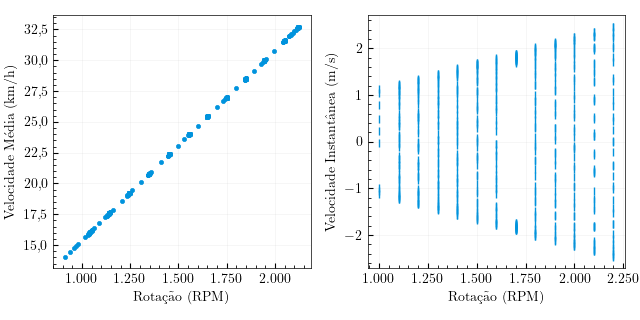

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16*cm, 8*cm))
plt.rcParams['xtick.minor.bottom'] = True

# VELOCIDADE MEDIA X ROTACAO
ax1.scatter(ROTACAO_NOMINAL * 60,
            VEL_MEDIA * 3.6,
            marker=MARKER)
ax1.set_xlabel('Rotação (RPM)')
ax1.set_ylabel('Velocidade Média (km/h)')

# VELOCIDADE MAXIMA X ROTACAO
ax2.scatter(ROTACAO * 60,
            VEL_INST,
            marker='|')
ax2.set_xlabel('Rotação (RPM)')
ax2.set_ylabel('Velocidade Instantânea (m/s)')
# ax2.tick_params(labelrotation=45)
# ax2.set_xticks([])

fig.tight_layout()
fig.savefig('../relatorio/figuras/velocidades_rot.pgf',
            backend='pgf')

### 2.6 Comportamento da pressão de Boost (admissão) $\times$ rotação
- verificar influência da pressão de Boost

###  2.7 Índice de mach na válvula de admissão em condição de potência e torque máximo

####  2.7.1 Índice de mach com potência máxima

####  2.7.2 Índice de mach com torque máxima